# Chapter 4: Finding Hidden Insights

We will head to the most interesting part of this section, visualization. A Data Scientist key superpower is the ability to capture insights and patterns hidden in raw data. Similar to all other aspects, this key skill also requires contextual knowledge and experience with similar problems to extract the piece of information we need to. Visualization offers us the ability to perform this and to see data in a way not possible otherwise. In this section we'll go through a resourcful list of plots and graphs that will be suitable for the analysis of traffic stops data that we've been working on.

We will get to see what sort of plots works for a particular data type, for eg. what is the most suitable way of visualizing a categorical value. Moreover, we will get to learn what we need to plot in order to get the information we require. What if we need to check for outliers or check the correlatin between 2 variables. We will extend our study from understanding a single dimension to multiple. 

You already came accross a visualization exercise in the previous chapter when you looked at the density plot for the Duration variable. You could see the valuable information it offered regarding the average durations and offered an insight over some extreme values that were skewing the entire results. We then corrected the visuals by bouding our data and saw how it enabled us to get a clearer visual of the actual series. Additionally, another interesting insight that we can uncover, and ponder more over, is why certain stops went way beyond the average. What do such stops entail? Do they hint towards some certain kind of discrimination to a particular race? 

One oit that all Data Scientists must be very careful about falling into is the one of deducing correlation as causation. Your visuals might give an impression of a causal relation between two variables, however, such a deduction of assuming it as a causal relation can seriously harm our analysis. We will touch more upon this in the upcoming chapters.

![](https://campaignforaction.org/wp-content/uploads/2016/02/Data1-1.jpg)

At its core, data visualization has three purposes:

- Reduces the complexity and ambiguity in the data and gives us business value.
- Promotes the understanding of data by representing in a visually appealing manner.
- Improves the decision making by allowing us to make data-driven decisions easily.

### Guided Practice

In this practice we will discover the Seaborn library. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. We will learn more about visualization with matplotlib ahead. 

For now, let us import the seaborn package and alias it as sns. In the line below that we are also setting the dimensions of our plots.

In [32]:
import pandas as pd
import seaborn as sns
# set dimensions for plots
sns.set(rc={'figure.figsize':(14,10)})

In [21]:
# reading data
stops_filtered = pd.read_csv('stops_filtered.csv')

Our first task is to check the count of each race in our dataset. This will enable us to get an idea of tha sample of each race in the dataset to make assumptions accordingly. We will use a histogram for that.

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins. Since Race here is a discrete value, histogram will enable us to get a count of each RACE in the dataset.

As you may notice below, the command to produce a histogram is pretty simple and intuitive. What do you notice from the plot below?

<AxesSubplot:xlabel='DRRACE', ylabel='Count'>

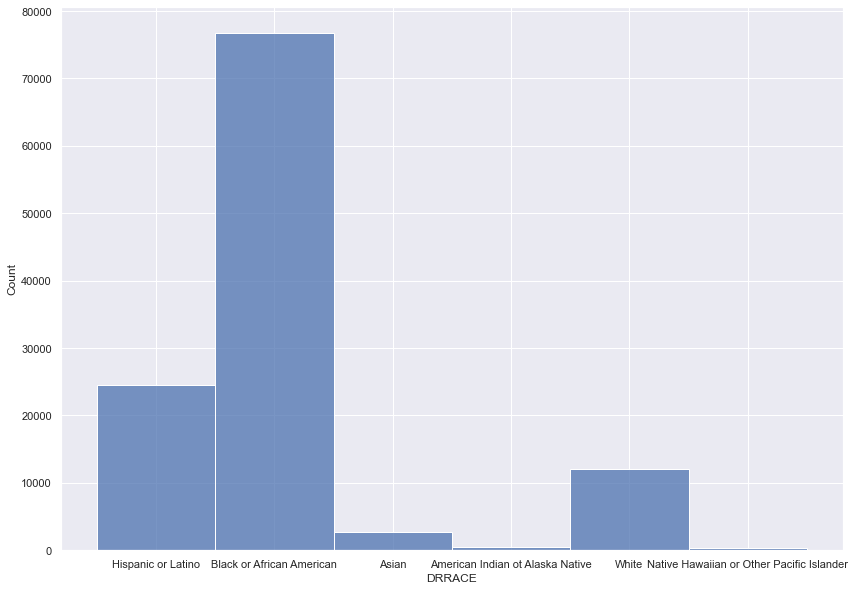

In [22]:
# RACE count
sns.histplot(data = stops_filtered, x = 'DRRACE')

We can see that African American and Hispanic drivers contitue the highest amount of stops. Is that also an actual reflection of their population in the selected beats? We'll find out more in the next chapter but this is certainly a question to ponder over to know what steps we need to perform.

For the drivers who were stopped and a contraband search was conducted, we might want to know that how many of them were actually carrying contraband by each race. The 1 in the legend tells us that contraband was found. By segmenting the data using 'VEHCONTRA' as the hue parameter, we will be able to see those results.

<AxesSubplot:xlabel='DRRACE', ylabel='Count'>

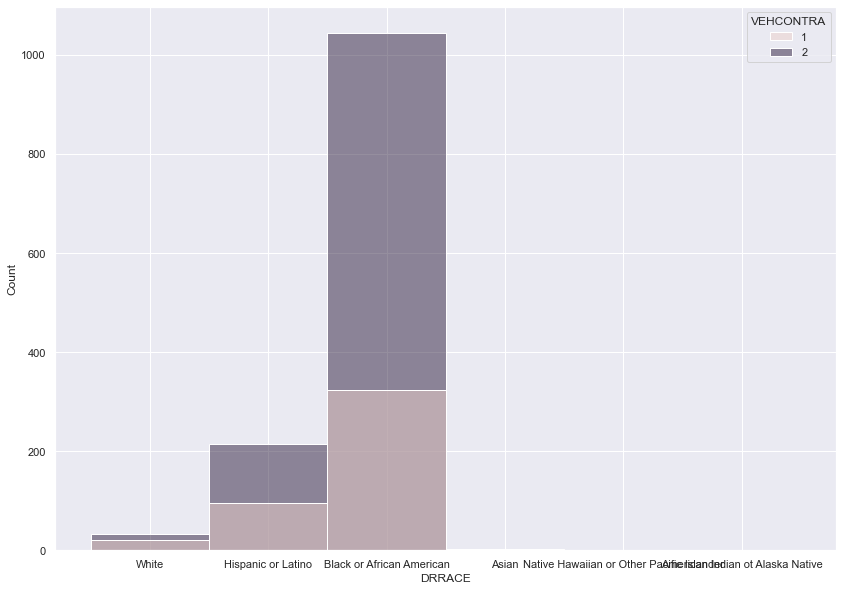

In [23]:
# Notice that we filtered out VEHCONTRA with values 0
sns.histplot(data = stops_filtered[stops_filtered['VEHCONTRA'] != 0], x = 'DRRACE', hue = 'VEHCONTRA')

The plot above provides some takeaways. We can notice that Asian, Hawaiian or Alaskan natives weren't searched for contraband in that duration. Moreover, African Americans were searched the most, however, the likelihood of finding a contraband was less than half. There is a similar trend for Hispanics but an opposite trend for whites. This cannot taken to be as the sole conclusion as African American and Hispanics were overall a large portion of the stops, therefore, we cannot conclude that it indicates any bias towards these groups yet.

We will also have a look how at how stops were made over different days and what does that indicate. Below we'll use seaborn's line plot to show the trend of stops over time. We have used the groupby feature (to be discussed later) to count the umber of stops each day and plot it over time. Let's see what we get

<AxesSubplot:xlabel='DATESTOP', ylabel='DURATION'>

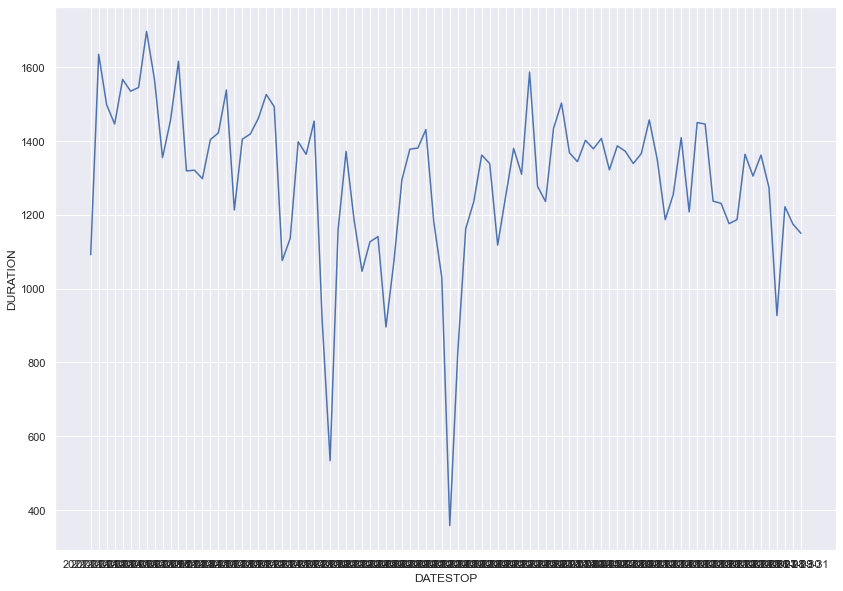

In [37]:
stops_group = stops_filtered.groupby('DATESTOP').count()
sns.lineplot(data = stops_group, x = 'DATESTOP', y = 'DURATION')

From the plot above, we can find a cyclic trend. If you notice this shows how stops change over weekend and weekdays. Similalry, we see 2 major spikes on specific days. We can go in further depth to see what they show us. In the next chapter we will see that how we can create further features out of it in order to have meaningful variables that are going to be useful for our analsis.

We diplayed a displayed a density plot in the last chapter. Boxplot is another way to visualize the statistical trend and presence of outliers in a column with respect to that trend.

<AxesSubplot:xlabel='DURATION'>

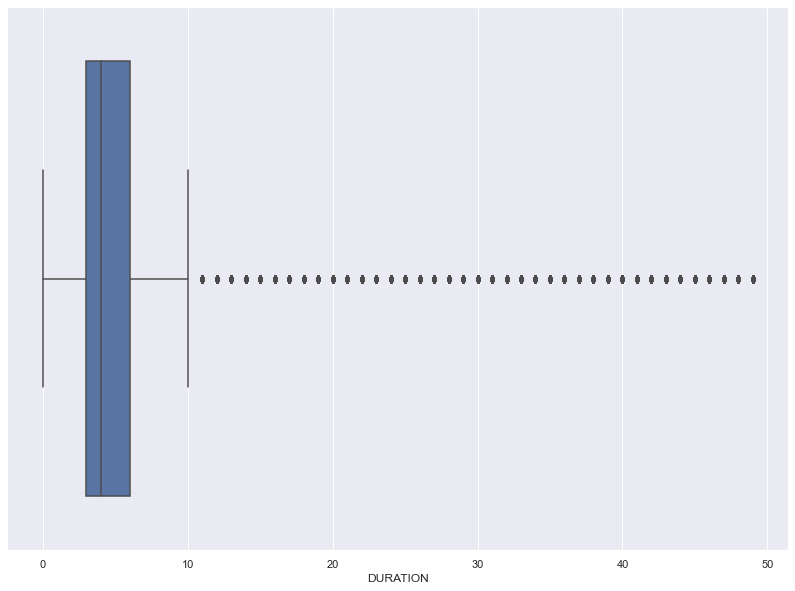

In [38]:
sns.boxplot(data= stops_filtered[stops_filtered['DURATION']<50], x="DURATION")

The above plot provides us similar insights to what we noticed in the density plot in the last chapter. Here we can also notice the specific points the outliers occur. The middle line in the box shows us the 50th quartile whereas the 2 ends of the box show us the 25th and 75th quartile. The last line is the 90th quartile showing that 90% values fall below a duration of 10 minutes. 

Boxplots are also idea to compare categorical values with continuous ones. In the plot below we can use boxplot to see how duration varies for each race. We have limited the duration to 10 minutes since this way we can cover 90% of the data without getting skewed results in the plot. 

<AxesSubplot:xlabel='DURATION', ylabel='DRRACE'>

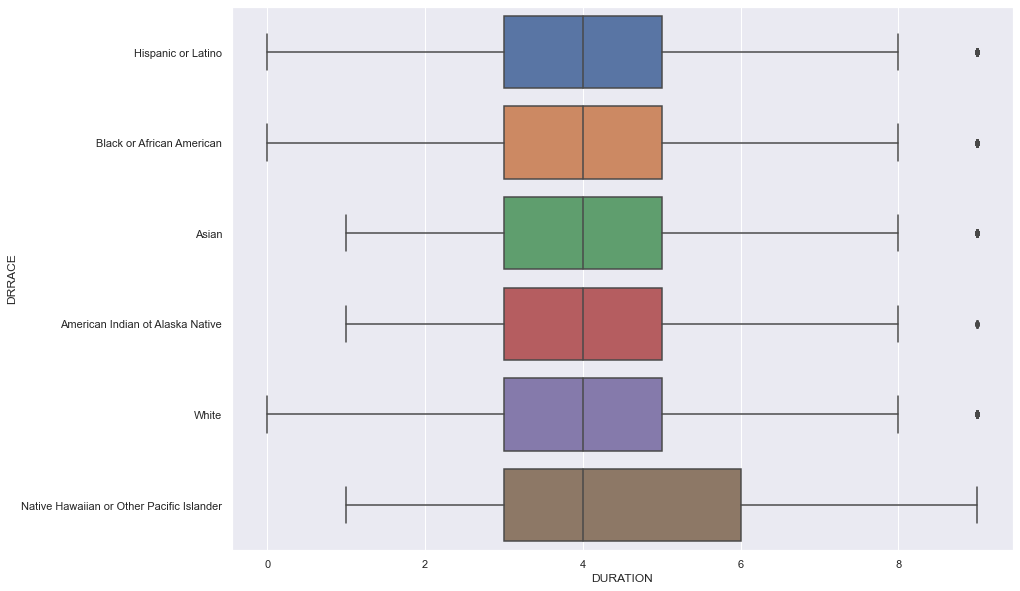

In [35]:
sns.boxplot(data= stops_filtered[stops_filtered['DURATION']<10], x="DURATION", y="DRRACE")

You can notice how the duration remains almost consistent for all races, with slight variation in the 75th quartile for Native Hawaiians. From this plot, we cannot say that the police was bias towards certain races by making them wait long.

### Exercise

Now is the time to capture more such insights. We've offered you the prompts below. Use the seaborn package to create plots and give your conclusion for the results you fine.

In [ ]:
# A histogram for stops in the first 20 beats

In [ ]:
# A histogram of race segmented by if drugs were found

In [ ]:
# A lineplot to show stops for times of a day

In [ ]:
# Show how duration was affected if drugs or weapons were found